In [28]:
from fastai.tabular.all import *

# Load the csv
df = pd.read_csv('./date_hood_thefts_filled.csv',
                 names=["date", "hood_id", "thefts"])
df.head()


,date,hood_id,thefts
0,2015-01-01,0,0
1,2015-01-01,1,0
2,2015-01-01,2,0
3,2015-01-01,3,0
4,2015-01-01,4,0


In [29]:
# Transform the date column to a datetime object
make_date(df, 'date')
df.head()


,date,hood_id,thefts
0,2015-01-01,0,0
1,2015-01-01,1,0
2,2015-01-01,2,0
3,2015-01-01,3,0
4,2015-01-01,4,0


In [30]:
# Feature engineer the date column
add_datepart(df, 'date')
df.head()

,hood_id,thefts,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,0,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
1,1,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
2,2,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
3,3,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
4,4,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09


In [31]:
# Create a data frame that only has thefts set to 0
df_0 = df[df['thefts'] == 0]

# Create a data frame where thefts are not 0
df_not_0 = df[df['thefts'] != 0]

# Create a dataframe merging df_not_0 and part of df_0
df_0 = df_0.sample(frac=0.4)
df = pd.concat([df_not_0, df_0])

# Sort the dataframe by date
df = df.sort_values(by=['Elapsed'])

df[:40]

,hood_id,thefts,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
42,42,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
33,33,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
105,105,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
35,35,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
118,118,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
43,43,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
27,27,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
94,94,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
28,28,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09
84,84,0,2015,1,1,1,3,1,False,True,False,True,False,True,1.420070e+09


In [32]:
# Split the data into train and validation sets where the end of the set is the validation set
splits = EndSplitter(valid_pct=0.2, valid_last=True)(range_of(df))

# Create a TabularPandas object
tabular_pandas = TabularPandas(
    df, procs=[Categorify, FillMissing, Normalize],
    cat_names=['hood_id', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end',
               'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'],
    cont_names=[],
    y_names="thefts", y_block=CategoryBlock,
    splits=splits)

tabular_pandas.xs.iloc[:5]


/Users/pika/.pyenv/versions/3.9.13/lib/python3.9/site-packages/fastai/tabular/core.py:279: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to.conts = (to.conts-self.means) / self.stds


,hood_id,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
42,43,1,1,1,1,4,1,1,2,1,2,1,2
33,34,1,1,1,1,4,1,1,2,1,2,1,2
105,106,1,1,1,1,4,1,1,2,1,2,1,2
35,36,1,1,1,1,4,1,1,2,1,2,1,2
118,119,1,1,1,1,4,1,1,2,1,2,1,2


In [33]:
# Set the batch size
data_loader = tabular_pandas.dataloaders()
data_loader.show_batch()

/Users/pika/.pyenv/versions/3.9.13/lib/python3.9/site-packages/fastai/tabular/core.py:284: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to.conts = (to.conts*self.stds ) + self.means


,hood_id,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,thefts
0,46,2016,2,6,12,4,43,False,False,False,False,False,False,0
1,51,2020,2,9,26,2,57,False,False,False,False,False,False,1
2,146,2018,12,1,31,0,365,True,False,True,False,True,False,0
3,29,2018,3,11,16,4,75,False,False,False,False,False,False,0
4,12,2015,1,4,23,4,23,False,False,False,False,False,False,1
5,9,2017,5,19,13,5,133,False,False,False,False,False,False,0
6,20,2019,10,44,31,3,304,True,False,False,False,False,False,0
7,29,2020,7,30,20,0,202,False,False,False,False,False,False,0
8,47,2019,7,29,17,2,198,False,False,False,False,False,False,0
9,111,2019,6,24,13,3,164,False,False,False,False,False,False,0


In [48]:
# Create a model with cross entropy loss
learn = tabular_learner(data_loader, metrics=accuracy)


In [49]:
# Train the model
learn.fit(2)


epoch,train_loss,valid_loss,accuracy,time
0,0.603987,0.604417,0.746616,01:22
1,0.603383,0.603440,0.748747,01:18


In [50]:
# Show the results
learn.show_results(max_n=50)


,hood_id,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,thefts,thefts_pred
0,97,0,7,27,7,3,188,1,1,1,1,1,1,0,0
1,98,0,6,23,8,3,159,1,1,1,1,1,1,0,0
2,72,0,6,23,11,6,162,1,1,1,1,1,1,0,0
3,109,0,10,41,13,3,286,1,1,1,1,1,1,0,0
4,55,0,3,13,28,1,87,1,1,1,1,1,1,0,0
5,111,0,6,26,27,1,178,1,1,1,1,1,1,0,0
6,41,0,8,32,11,3,223,1,1,1,1,1,1,0,0
7,115,0,9,39,28,2,271,1,1,1,1,1,1,0,0
8,55,0,2,7,18,4,49,1,1,1,1,1,1,0,0
9,58,0,5,21,29,7,149,1,1,1,1,1,1,2,0


In [51]:
# Get the predictions and target values
preds, targs = learn.get_preds()
print(preds)
print(targs)


tensor([[3.8826e-01, 4.7511e-01, 1.1870e-01, 1.5232e-02, 2.6896e-03, 9.3835e-08],
        [6.4536e-01, 3.1868e-01, 3.3759e-02, 2.0107e-03, 1.8409e-04, 1.7454e-06],
        [8.0256e-01, 1.8456e-01, 1.2303e-02, 5.3398e-04, 3.6831e-05, 5.8971e-07],
        ...,
        [6.3006e-01, 3.3597e-01, 3.2007e-02, 1.8223e-03, 1.3813e-04, 3.3123e-07],
        [6.3282e-01, 3.3246e-01, 3.2667e-02, 1.9004e-03, 1.4705e-04, 5.1559e-07],
        [6.5199e-01, 3.1664e-01, 2.9612e-02, 1.6212e-03, 1.3298e-04, 8.0245e-07]])
tensor([[0],
        [0],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=torch.int8)


In [52]:
# Get the highest value from the predictions tensor
preds = preds.argmax(dim=-1)
print(preds)

tensor([1, 0, 0,  ..., 0, 0, 0])


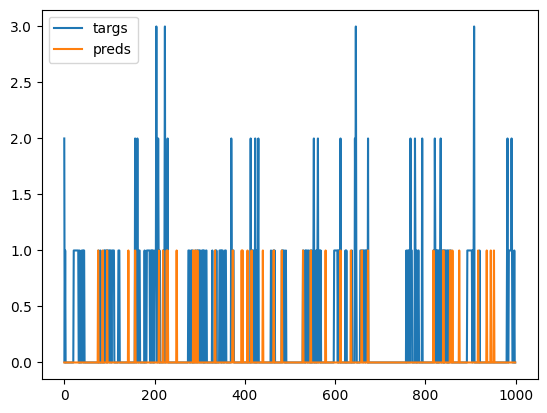

In [53]:
# Plot only the highest predictions vs target in a line plot las 4000 values
plt.plot(targs[-1000:].numpy(), label='targs')
plt.plot(preds[-1000:].numpy(), label='preds')
plt.legend()
plt.show()

In [54]:
# With sckiit-learn calculate the mean squared error and accuracy
from sklearn.metrics import mean_squared_error, accuracy_score

# Round the predictions to the nearest integer
preds = np.round(preds)

print('Mean squared error: ', mean_squared_error(targs, preds))
print('Accuracy: ', accuracy_score(targs, preds))

Mean squared error:  0.32867556244399776
Accuracy:  0.7487467609522195


In [ ]:
# Export the model
learn.export('deep_learning_models_0_fill_imbalance.pkl')